<a href="https://colab.research.google.com/github/muxair080/Big-Mart-Sales/blob/main/trafic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [96]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [97]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gtsrb-german-traffic-sign.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,BatchNormalization

# Convert images to arrays

In [99]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Preprocess Images

In [100]:
# /content/train/0/00000_00000_00000.png

In [101]:
for i in range(classes):
  path = os.path.join(cur_path, 'train', str(i))
  # print(path)
  images = os.listdir(path)
  # print(images)
  for img in images:
    try:
      image = Image.open(path+'//'+img)
      image = image.resize((30,30))
      image = np.array(image)
      data.append(image)
      labels.append(i)
    except Exception as e:
      print(e)



In [102]:
d = np.array(data)
d.shape

(39209, 30, 30, 3)

# List to numpy arrays

In [103]:
data = np.array(data)
labels = np.array(labels)

In [104]:
data

array([[[[ 76,  63,  69],
         [ 73,  65,  68],
         [ 72,  64,  68],
         ...,
         [ 27,  27,  24],
         [ 27,  27,  26],
         [ 23,  25,  24]],

        [[ 73,  74,  80],
         [ 84,  76,  79],
         [ 85,  78,  78],
         ...,
         [ 51,  47,  44],
         [ 54,  50,  48],
         [ 55,  52,  50]],

        [[ 72,  82,  88],
         [132, 116, 120],
         [139, 125, 124],
         ...,
         [ 72,  68,  66],
         [ 72,  69,  67],
         [ 73,  71,  70]],

        ...,

        [[178, 171, 169],
         [179, 174, 174],
         [182, 176, 177],
         ...,
         [163, 160, 161],
         [156, 155, 158],
         [164, 157, 160]],

        [[178, 170, 171],
         [181, 175, 175],
         [182, 177, 174],
         ...,
         [128, 133, 136],
         [109, 120, 127],
         [134, 137, 144]],

        [[181, 172, 172],
         [182, 175, 173],
         [182, 177, 171],
         ...,
         [ 92, 108, 114],
        

# Save Labels & Data in files

In [105]:
np.save('/content/data/data', data)
np.save('/content/data/labels', labels)

# Load Data & Labels

In [106]:
data = np.load('/content/data/data.npy')
labels = np.load('/content/data/labels.npy')

In [107]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(data, 
                  labels,test_size=0.2, random_state=0)

# Convert labels to onehot encoding

In [109]:
Y_train = to_categorical(Y_train, 43)
Y_test = to_categorical(Y_test, 43)

In [110]:
input_shape=X_train.shape[1:]
input_shape

(30, 30, 3)

# Build CNN

In [111]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu',
                input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [112]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [113]:
histroy  = model.fit(X_train, Y_train, batch_size=32, 
                     epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
981/981 [==============================] - 6s 6ms/step - loss: 2.2680 - accuracy: 0.4102 - val_loss: 0.8593 - val_accuracy: 0.7445
Epoch 2/20
981/981 [==============================] - 6s 6ms/step - loss: 0.9574 - accuracy: 0.7092 - val_loss: 0.4469 - val_accuracy: 0.8699
Epoch 3/20
981/981 [==============================] - 6s 6ms/step - loss: 0.6233 - accuracy: 0.8117 - val_loss: 0.3460 - val_accuracy: 0.8908
Epoch 4/20
981/981 [==============================] - 6s 6ms/step - loss: 0.4803 - accuracy: 0.8523 - val_loss: 0.1793 - val_accuracy: 0.9490
Epoch 5/20
981/981 [==============================] - 6s 6ms/step - loss: 0.4121 - accuracy: 0.8773 - val_loss: 0.2178 - val_accuracy: 0.9406
Epoch 6/20
981/981 [==============================] - 6s 6ms/step - loss: 0.3619 - accuracy: 0.8914 - val_loss: 0.1204 - val_accuracy: 0.9651
Epoch 7/20
981/981 [==============================] - 6s 6ms/step - loss: 0.3452 - accuracy: 0.8988 - val_loss: 0.1020 - val_accuracy: 0.9726
Epoch 

#  Accuracy

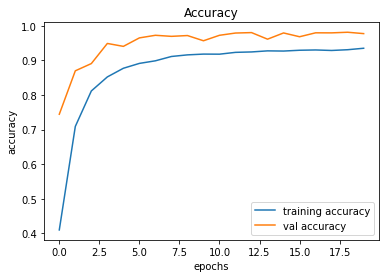

In [114]:
plt.figure(0)
plt.plot(histroy.history['accuracy'], label='training accuracy')
plt.plot(histroy.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Testing Data

In [125]:
tst = pd.read_csv('Test.csv')
label = tst['ClassId'].values
imgs = tst['Path'].values
print(label)
print(imgs)
data = []
for img in imgs:
  image = Image.open(img)
  image = image.resize((30,30))
  data.append(np.array(image))

X_test = np.array(data)



[16  1 38 ...  6  7 10]
['Test/00000.png' 'Test/00001.png' 'Test/00002.png' ... 'Test/12627.png'
 'Test/12628.png' 'Test/12629.png']


In [127]:
Y_pred = np.argmax(model.predict(X_test), axis=-1)
Y_pred

395/395 [==============================] - 1s 2ms/step


array([16,  1, 38, ..., 32,  7, 10])

In [128]:
Y_pred.min()

0

# Accuracy on Testing Data

In [129]:
from sklearn.metrics import accuracy_score

In [191]:
accuracy_score(label, Y_pred)

0.9448931116389548

In [190]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [192]:
from PIL import Image
import numpy as np

def test_on_img(img):
  data = []
  image = Image.open(img)
  image = image.resize((30,30))
  data.append(np.array(image))
  X_test = np.array(data)
  Y_pred = np.argmax(model.predict(X_test), axis=-1)
  return image, Y_pred


In [ ]:
# /content/Test/00002.png
plot, prediction = test_on_img(r'/content/Test/00002.png')
s = [str(i) for i in prediction]
a = int("".join(s))
# print(a)
print("Predicted traffic sign is  : ", classes[a])
plt.imshow(plot)
plt.show()